In [1]:
import pyforest

In [3]:
messages = pd.read_csv(r'spam1.csv', encoding = 'cp1252')

<IPython.core.display.Javascript object>

In [4]:
messages.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
messages.shape

(6776, 5)

In [6]:
messages = messages.iloc[:,[0,1]]

In [7]:
messages

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
6771,spam,This is the 2nd time we have tried 2 contact u...
6772,ham,Will Ì_ b going to esplanade fr home?
6773,ham,"Pity, * was in mood for that. So...any other s..."
6774,ham,The guy did some bitching but I acted like i'd...


In [ ]:
# Change Column name.

In [8]:
messages.rename(columns={'v1':'label', 'v2':'message'}, inplace = True)

C:\Users\shubh\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [9]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
messages.label.value_counts()

ham     5854
spam     922
Name: label, dtype: int64

In [ ]:
# Change Spam and ham to 0 and 1.

In [11]:
messages.label.replace({'ham':0, 'spam':1}, inplace= True)

In [13]:
# messages.label.value_counts()

# Data Preparation.
1. whole data either converted t upper or lower case because python is case sensitive.

In [14]:
messages.message = messages.message.str.lower()

In [16]:
# messages.head()

In [17]:
from nltk.corpus import stopwords

In [23]:
stopwords.words('english')

179

In [22]:
# nltk.download('stopwords')

In [24]:
import string

In [25]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [26]:
def text_process(mess): ### creating a function
    """ ## a docstring
    1. remove the punctuation
    2. remove the stopwords
    3. return the list of clean textwords

    """
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = "".join(nopunc)

    return [ word for word in nopunc.split() if word not in stopwords.words("english")]

In [27]:
messages['message'].apply(text_process)

0       [go, jurong, point, crazy, available, bugis, n...
1                          [ok, lar, joking, wif, u, oni]
2       [free, entry, 2, wkly, comp, win, fa, cup, fin...
3           [u, dun, say, early, hor, u, c, already, say]
4       [nah, dont, think, goes, usf, lives, around, t...
                              ...                        
6771    [2nd, time, tried, 2, contact, u, u, å£750, po...
6772                   [ì, b, going, esplanade, fr, home]
6773                     [pity, mood, soany, suggestions]
6774    [guy, bitching, acted, like, id, interested, b...
6775                                   [rofl, true, name]
Name: message, Length: 6776, dtype: object

In [28]:
from sklearn.feature_extraction.text import CountVectorizer # its is used to get the count of each and every word.

In [29]:
bow_transformen = CountVectorizer(analyzer=text_process).fit(messages['message']) # TDM

In [32]:
bow_transformen.vocabulary_# Count of each rows and columns

9422

In [33]:
len(bow_transformen.vocabulary_)

9422

In [34]:
messages_bow = bow_transformen.transform(messages.message)

In [35]:
messages_bow.shape

(6776, 9422)

In [36]:
type(messages_bow)

scipy.sparse.csr.csr_matrix

In [37]:
# message_bow is like my x.
# messages.label = y

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(messages_bow, messages.label, test_size = 0.2)

In [42]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()

In [43]:
spam_nb_model = naive_bayes.fit(x_train, y_train)

In [44]:
pred = naive_bayes.predict(x_test)

In [46]:
from sklearn.metrics import confusion_matrix

tab_dt= confusion_matrix(pred, y_test)
tab_dt

array([[1126,   12],
       [  24,  194]], dtype=int64)

In [49]:
con_mat=confusion_matrix(pred,y_test)
# This is Direct method
print("This is Confusion Matrix",)
print(con_mat)

fp=con_mat[1][0]
fn=con_mat[0][1]
tp=con_mat[1][1]
tn=con_mat[0][0]

Acc=(tp+tn)/(fp+fn+tp+tn)
FPR=(fp/(fp+tn))
TPR=(tp/(tp+fn))
Precision=(tp/(tp+fp))
Recall=TPR
f1_score=(2*Precision*Recall/(Precision+Recall))

df=pd.DataFrame({'Naive Bayes':[round(Acc*100,2),round(FPR*100,2),round(TPR*100,2),round(Precision*100,2),round(f1_score*100,2)]},
index=(["Accuracy",'FPR','TPR/Recall','Precision','F1_score']))
df

This is Confusion Matrix
[[1126   12]
 [  24  194]]


<IPython.core.display.Javascript object>

,Naive Bayes
Accuracy,97.35
FPR,2.09
TPR/Recall,94.17
Precision,88.99
F1_score,91.51


In [51]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
dt_pred = dt.predict(x_test)
tab_dt= confusion_matrix(pred, y_test)
tab_dt

array([[1126,   12],
       [  24,  194]], dtype=int64)

In [52]:
import matplotlib.pyplot as plt

In [53]:
!pip install wordcloud

In [58]:
spam = [str(messages['message']) == 'spam']

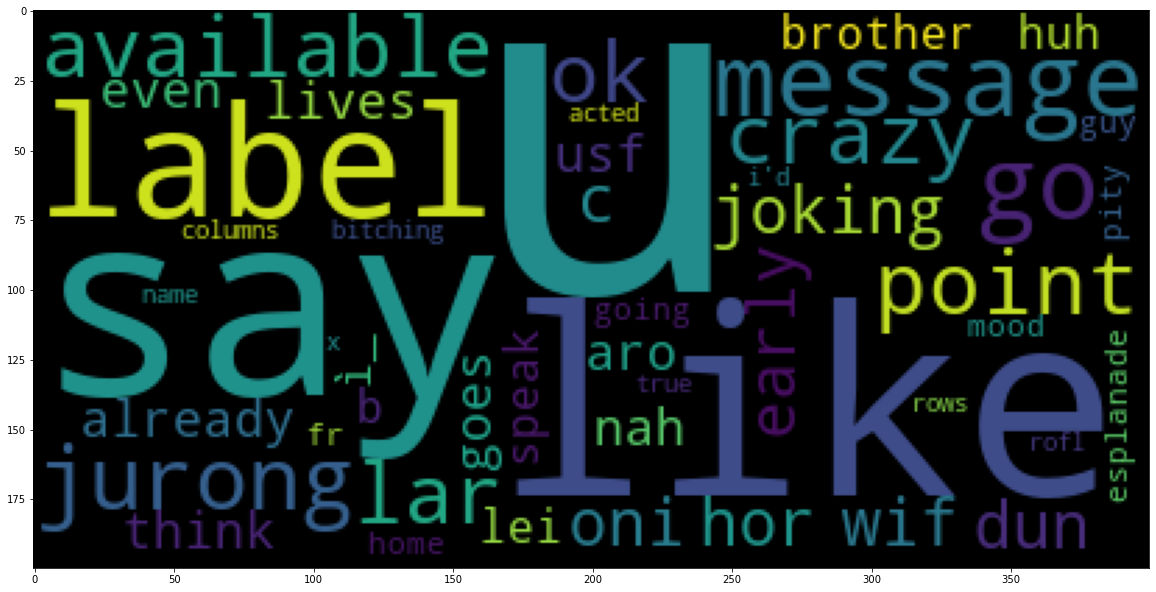

In [85]:
from wordcloud import WordCloud
cloud = WordCloud(stopwords=stopwords.words('english'), max_words = 100).generate(str(messages[messages.label == 0]))
plt.figure(figsize = (20,20))
plt.imshow(cloud)

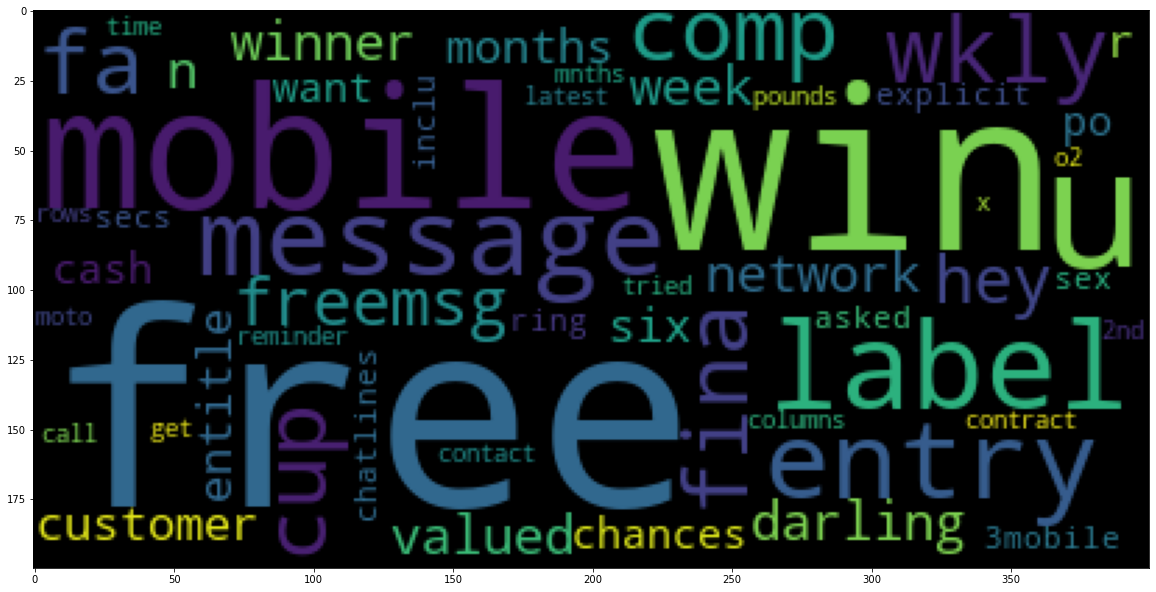

In [84]:
from wordcloud import WordCloud
cloud = WordCloud(stopwords=stopwords.words('english'), max_words = 100).generate(str(messages[messages.label == 1]))
plt.figure(figsize = (20,20))
plt.imshow(cloud)

In [86]:
df_ham = messages[messages.label== 0] 
df_spam = messages[messages.label== 1] 


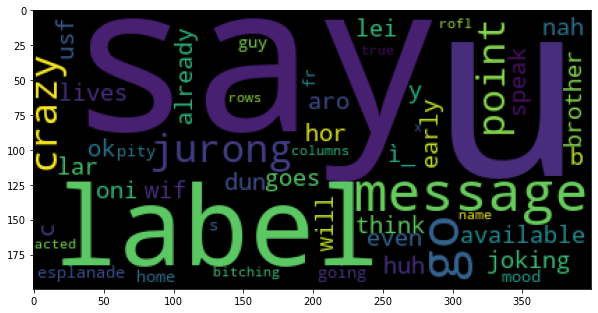

In [87]:
cloud = WordCloud( max_words= 50).generate(str(messages[messages.label==0]))
plt.figure(figsize=(10,8))
plt.imshow(cloud)
plt.show()